<a href="https://colab.research.google.com/github/TsaiShih/ML_Practice/blob/main/ML_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get path

In [ ]:
import os
cwd= os.getcwd()
print (cwd)

/content


# Get data from drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 監督式學習 Supervised learning

## Regression

### 線性回歸 Linear Regression
- Stock price predictioI
- Predicting housing price
- Predicting customer lifetime value

Dataset
- USA_Housing

 https://www.kaggle.com/datasets/vedavyasv/usa-housing

- Practical Introduction to 10 Regression Algorithm

 https://www.kaggle.com/code/faressayah/practical-introduction-to-10-regression-algorithm/notebook

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!pip install hvplot
import hvplot.pandas
hvplot.extension("matplotlib")

%matplotlib inline


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 10.7 MB/s eta 0:00:00


In [ ]:
USAhousing = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine learning/dataset/USA_Housing.csv')
USAhousing.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3                          USS Barnett\nFPO AP 44820  
4                         USNS Raymond\nFPO AE 09386

In [ ]:
USAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [ ]:
USAhousing.describe()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562388             5.322283                   6.299250   
50%        68804.286404             5.970429                   7.002902   
75%        75783.338666             6.650808                   7.665871   
max       107701.748378             9.519088                  10.759588   

       Avg. Area Number of Bedrooms  Area Population         Price  
count                   5000.000000      5000.000000  5.000000e+03  
mean                       3.981330     36163.516039  1.232073e+06  
std                        1.234137      9925.650114  3.531176e+05  
min                        2.000000       172.610686  1.593866e+04  
25%                        3.140000     29403.928702  9.975771e+05  
50%                        4.050000     36199.406689  1.232669e+06  
75%                        4.490000     42861.290769  1.471210e+06  
max                        6.500000     69621.713378  2.469066e+06

In [ ]:
USAhousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

#### EDA

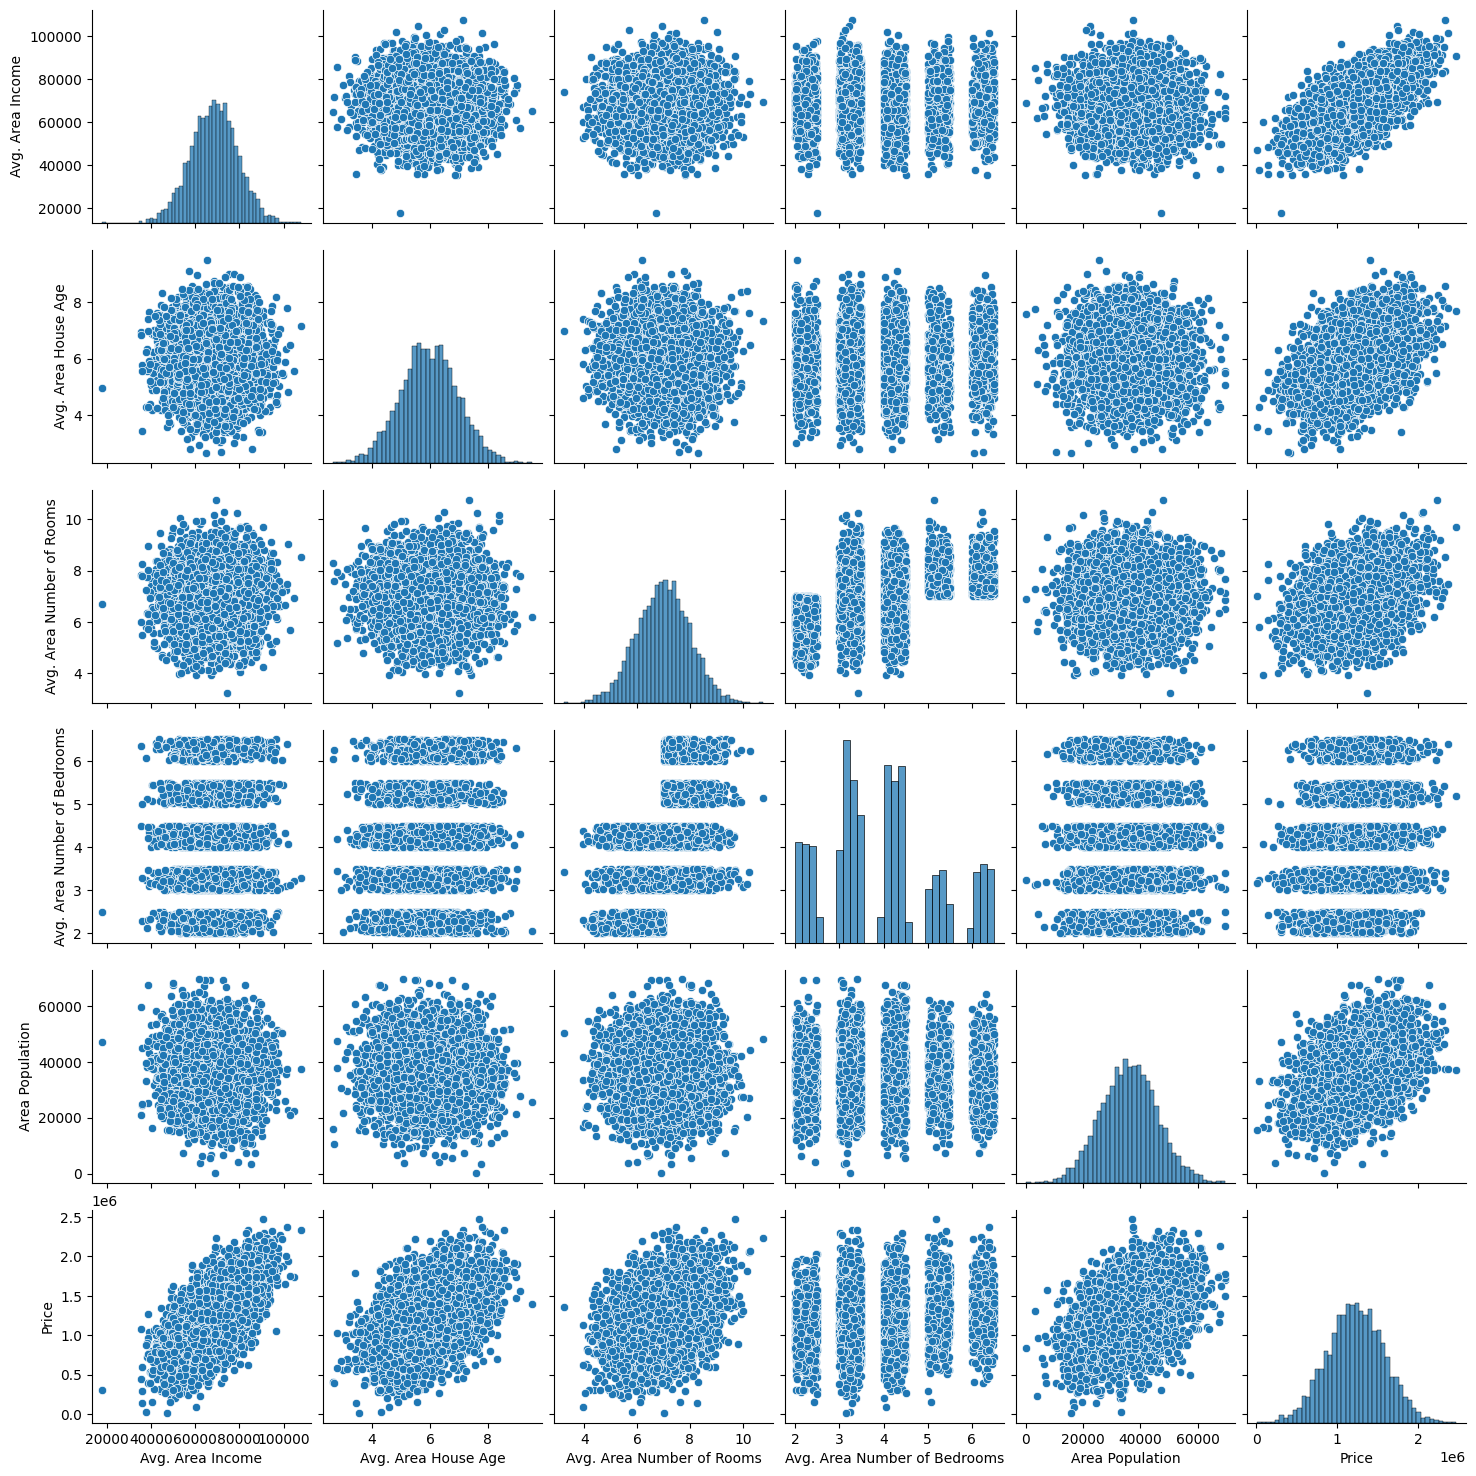

In [ ]:
# sns.pairplot pairwise relationships between variables within a dataset
sns.pairplot(USAhousing)

:NdOverlay   [Element]
   :Histogram   [Area Population]   (Area Population_count)
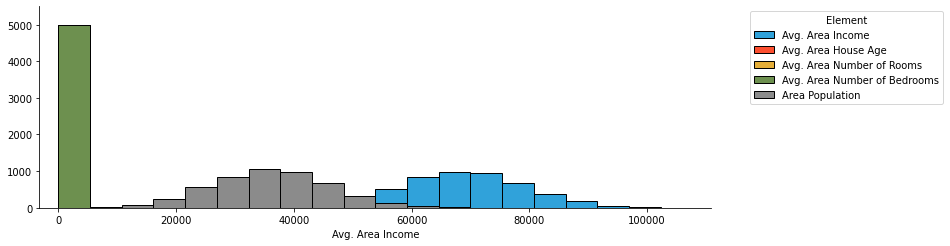

In [ ]:
# hvplot.hist representation of the distribution of numerical data
USAhousing.hvplot.hist(by='Price', subplots=False, width=1000)

:Histogram   [Price]   (Price_count)
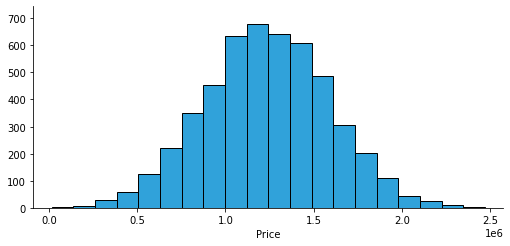

In [ ]:
USAhousing.hvplot.hist('Price')

:Scatter   [Avg. Area House Age]   (Price)
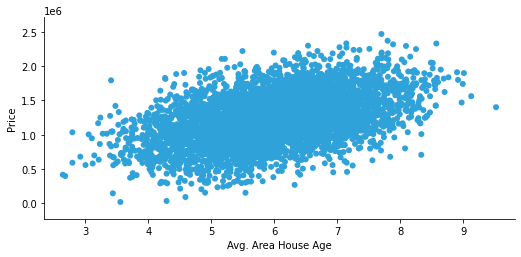

In [ ]:
USAhousing.hvplot.scatter(x='Avg. Area House Age', y='Price')

:Scatter   [Avg. Area Income]   (Price)
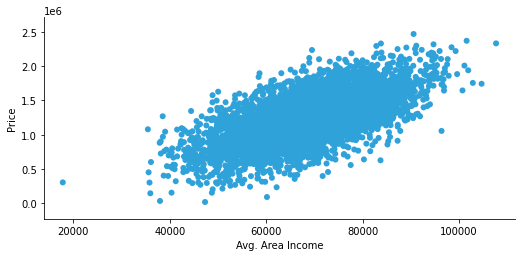

In [ ]:
USAhousing.hvplot.scatter(x='Avg. Area Income', y='Price')

In [ ]:
USAhousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [ ]:
USA_corr = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price']].corr()
USA_corr

Avg. Area Income  Avg. Area House Age  \
Avg. Area Income                      1.000000            -0.002007   
Avg. Area House Age                  -0.002007             1.000000   
Avg. Area Number of Rooms            -0.011032            -0.009428   
Avg. Area Number of Bedrooms          0.019788             0.006149   
Area Population                      -0.016234            -0.018743   
Price                                 0.639734             0.452543   

                              Avg. Area Number of Rooms  \
Avg. Area Income                              -0.011032   
Avg. Area House Age                           -0.009428   
Avg. Area Number of Rooms                      1.000000   
Avg. Area Number of Bedrooms                   0.462695   
Area Population                                0.002040   
Price                                          0.335664   

                              Avg. Area Number of Bedrooms  Area Population  \
Avg. Area Income                                  0.019788        -0.016234   
Avg. Area House Age                               0.006149        -0.018743   
Avg. Area Number of Rooms                         0.462695         0.002040   
Avg. Area Number of Bedrooms                      1.000000        -0.022168   
Area Population                                  -0.022168         1.000000   
Price                                             0.171071         0.408556   

                                 Price  
Avg. Area Income              0.639734  
Avg. Area House Age           0.452543  
Avg. Area Number of Rooms     0.335664  
Avg. Area Number of Bedrooms  0.171071  
Area Population               0.408556  
Price                         1.000000

<Axes: >

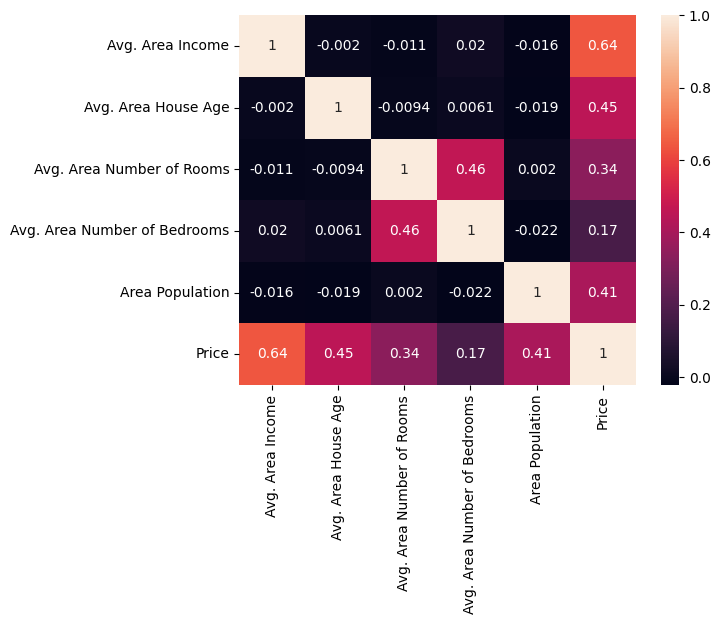

In [ ]:
sns.heatmap(USA_corr, annot=True)

#### Training model

In [ ]:
#Set independent and dependent variables
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
y = USAhousing[['Price']]

#Split data 70, 30
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)


#### Preparing Data For Linear Regression

- Linear Assumption (log transform for an exponential relationship)

- Remove Noise (remove outliers in the output variable (y))

- Remove Collinearity - linear regression will over-fit  (removing the most correlated)

- Gaussian Distributions (log or BoxCox)

- Rescale Inputs - make more reliable predictions (using standardization or normalization)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('std_scalar',StandardScaler())])
X_train = pipeline.fit_transform(X_train)
X_test= pipeline.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression

# Linear Regression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Model Evaluation
print(lin_reg.intercept_)

[1228219.14924157]


In [ ]:
pd.DataFrame(lin_reg.coef_[0], X.columns, columns=['Coefficient'])

Coefficient
Avg. Area Income              232679.724643
Avg. Area House Age           163841.046593
Avg. Area Number of Rooms     121110.555478
Avg. Area Number of Bedrooms    2892.815119
Area Population               151252.342377

- Avg. Area Income -> A.Income
- Avg. Area House Age -> A.HouseAge
- Avg. Area Number of Rooms -> A.Rooms
- Avg. Area Number of Bedrooms -> A.Bedrooms
- Area Population -> Population

Price = 232679.724 * A.Income + 163841.046 * A.HouseAge + 121110.555 *A.Rooms + 2892.815119 * A.Bedrooms + 151252.342 * Population + 1228219.149

Predictions from the model

In [ ]:
pred = lin_reg.predict(X_test)

:Scatter   [True Values]   (Predicted Values)
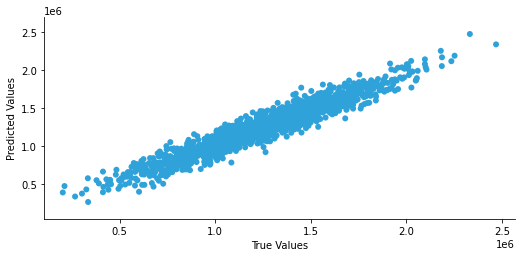

In [ ]:
pred_value = pred.flatten()
true_value = np.array(y_test).flatten()
pd.DataFrame({'True Values': true_value, 'Predicted Values': pred_value}).hvplot.scatter(x='True Values', y='Predicted Values')

### Residual Histogram

:Distribution   [Error Values]   (Density)
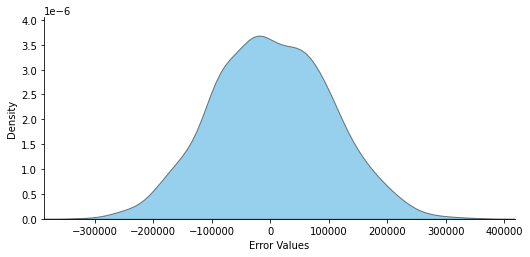

In [ ]:
pd.DataFrame({'Error Values': (true_value - pred_value)}).hvplot.kde()

### Regression Evaluation Metrics

Comparing these metrics:

- MAE (Mean Absolute Error) is the easiest to understand, because it's the average error.

- MSE (Mean Squared Error) is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.

- RMSE (Root Mean Squared Error) is even more popular than MSE, because RMSE is interpretable in the "y" units.

- All of these are loss functions, because we want to minimize them.

In [ ]:
# Build the functions for evaluation
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
  pred = cross_val_score(model, X, y, cv =10)
  return pred.mean()

def evaluate(true, predicted):

  mae = metrics.mean_absolute_error(true, predicted)
  mse = metrics.mean_squared_error(true, predicted)
  rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
  r2_square = metrics.r2_score(true, predicted)

  return mae, mse, rmse, r2_square

def print_evaluate(true, predicted):

  mae = metrics.mean_absolute_error(true, predicted)
  mse = metrics.mean_squared_error(true, predicted)
  rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
  r2_square = metrics.r2_score(true, predicted)

  print('MAE:', mae)
  print('MSE:', mse)
  print('RMSE:', rmse)
  print('R2 Square', r2_square)
  print('__________________________________')

In [ ]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print_evaluate(y_test,test_pred)
print_evaluate(y_train,train_pred)

result_df = pd.DataFrame(data = [["Linear Regression",*evaluate(y_test,test_pred),cross_val(LinearRegression())]],
                          columns = ['Model', 'MAE','MSE','RMSE','R2','Cross Validation'])
result_df

MAE: 81135.56609336878
MSE: 10068422551.40088
RMSE: 100341.52954485436
R2 Square 0.9146818498754016
__________________________________
MAE: 81480.49973174892
MSE: 10287043161.197224
RMSE: 101425.06180031257
R2 Square 0.9192986579075526
__________________________________


Model           MAE           MSE           RMSE        R2  \
0  Linear Regression  81135.566093  1.006842e+10  100341.529545  0.914682   

   Cross Validation  
0          0.917379

### Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)
print_evaluate(y_test,test_pred)
print_evaluate(y_train,train_pred)

result_df_2 = pd.DataFrame(data = [["Ridge Regression",*evaluate(y_test,test_pred),cross_val(Ridge())]],
                           columns = ['Model', 'MAE','MSE','RMSE','R2','Cross Validation'])
result_df = result_df.append(result_df_2, ignore_index=True)
result_df

MAE: 81428.64835535336
MSE: 10153269900.892609
RMSE: 100763.43533689494
R2 Square 0.9139628674464607
__________________________________
MAE: 81972.39058585507
MSE: 10382929615.143456
RMSE: 101896.66145239232
R2 Square 0.9185464334441484
__________________________________


<ipython-input-26-a8118d912692>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(result_df_2, ignore_index=True)


Model           MAE           MSE           RMSE        R2  \
0  Linear Regression  81135.566093  1.006842e+10  100341.529545  0.914682   
1   Ridge Regression  81428.648355  1.015327e+10  100763.435337  0.913963   

   Cross Validation  
0          0.917379  
1          0.917379

### Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

model = Lasso(alpha = 0.1, precompute = True, positive = True, selection = 'random',random_state = 42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)
print_evaluate(y_test,test_pred)
print_evaluate(y_train,train_pred)

result_df_2 = pd.DataFrame(data = [["Lasso Regression",*evaluate(y_test,test_pred),cross_val(Lasso())]],
                           columns = ['Model', 'MAE','MSE','RMSE','R2','Cross Validation'])
result_df = result_df.append(result_df_2, ignore_index=True)
result_df

MAE: 81135.6985172622
MSE: 10068453390.364523
RMSE: 100341.68321472648
R2 Square 0.914681588551116
__________________________________
MAE: 81480.63002185506
MSE: 10287043196.634295
RMSE: 101425.0619750084
R2 Square 0.9192986576295505
__________________________________


<ipython-input-27-0cddf0df49e8>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(result_df_2, ignore_index=True)


Model           MAE           MSE           RMSE        R2  \
0  Linear Regression  81135.566093  1.006842e+10  100341.529545  0.914682   
1   Ridge Regression  81428.648355  1.015327e+10  100763.435337  0.913963   
2   Lasso Regression  81135.698517  1.006845e+10  100341.683215  0.914682   

   Cross Validation  
0          0.917379  
1          0.917379  
2          0.917379

### Robust Regression
- Random Sample Consensus - RANSAC

In [ ]:
from sklearn.linear_model import RANSACRegressor

model = RANSACRegressor(base_estimator = LinearRegression(), max_trials=100)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)
print_evaluate(y_test,test_pred)
print_evaluate(y_train,train_pred)

result_df_2 = pd.DataFrame(data = [["Robust Regression",*evaluate(y_test,test_pred),cross_val(RANSACRegressor())]],
                           columns = ['Model', 'MAE','MSE','RMSE','R2','Cross Validation'])
result_df = result_df.append(result_df_2, ignore_index=True)
result_df

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ransac.py:343: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.1 and will be removed in 1.3.
  warnings.warn(


MAE: 82552.92607251497
MSE: 10521990578.411854
RMSE: 102576.75457145178
R2 Square 0.9108383893111789
__________________________________
MAE: 83079.68900507838
MSE: 10688117195.716335
RMSE: 103383.35066980725
R2 Square 0.9161522520495297
__________________________________


<ipython-input-28-4a0d17f7ccbb>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(result_df_2, ignore_index=True)


Model           MAE           MSE           RMSE        R2  \
0  Linear Regression  81135.566093  1.006842e+10  100341.529545  0.914682   
1   Ridge Regression  81428.648355  1.015327e+10  100763.435337  0.913963   
2   Lasso Regression  81135.698517  1.006845e+10  100341.683215  0.914682   
3  Robust Regression  82552.926073  1.052199e+10  102576.754571  0.910838   

   Cross Validation  
0          0.917379  
1          0.917379  
2          0.917379  
3          0.913290

### Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)
print_evaluate(y_test,test_pred)
print_evaluate(y_train,train_pred)

result_df_2 = pd.DataFrame(data = [["Elastic Net",*evaluate(y_test,test_pred),cross_val(ElasticNet())]],
                           columns = ['Model', 'MAE','MSE','RMSE','R2','Cross Validation'])
result_df = result_df.append(result_df_2, ignore_index=True)
result_df

MAE: 81184.43147330944
MSE: 10078050168.470106
RMSE: 100389.49232100991
R2 Square 0.9146002670381437
__________________________________
MAE: 81577.88831531754
MSE: 10299274948.10146
RMSE: 101485.34351373828
R2 Square 0.9192027001474953
__________________________________


<ipython-input-29-eb62979abc7e>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(result_df_2, ignore_index=True)


Model           MAE           MSE           RMSE        R2  \
0  Linear Regression  81135.566093  1.006842e+10  100341.529545  0.914682   
1   Ridge Regression  81428.648355  1.015327e+10  100763.435337  0.913963   
2   Lasso Regression  81135.698517  1.006845e+10  100341.683215  0.914682   
3  Robust Regression  82552.926073  1.052199e+10  102576.754571  0.910838   
4        Elastic Net  81184.431473  1.007805e+10  100389.492321  0.914600   

   Cross Validation  
0          0.917379  
1          0.917379  
2          0.917379  
3          0.913290  
4          0.879545

### Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)

lin_reg = LinearRegression(fit_intercept=False)
lin_reg.fit(X_train_2_d, y_train)

test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)

print_evaluate(y_test,test_pred)
print_evaluate(y_train,train_pred)

result_df_2 = pd.DataFrame(data = [["Polynomial Regression",*evaluate(y_test,test_pred),0]],
                           columns = ['Model', 'MAE','MSE','RMSE','R2','Cross Validation'])
result_df = result_df.append(result_df_2, ignore_index=True)
result_df

MAE: 81174.51844119697
MSE: 10081983997.620695
RMSE: 100409.08324260656
R2 Square 0.914566932419506
__________________________________
MAE: 81363.0618562117
MSE: 10266487151.007816
RMSE: 101323.67517519198
R2 Square 0.9194599187853729
__________________________________


<ipython-input-30-918e319f05db>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(result_df_2, ignore_index=True)


Model           MAE           MSE           RMSE        R2  \
0      Linear Regression  81135.566093  1.006842e+10  100341.529545  0.914682   
1       Ridge Regression  81428.648355  1.015327e+10  100763.435337  0.913963   
2       Lasso Regression  81135.698517  1.006845e+10  100341.683215  0.914682   
3      Robust Regression  82552.926073  1.052199e+10  102576.754571  0.910838   
4            Elastic Net  81184.431473  1.007805e+10  100389.492321  0.914600   
5  Polynomial Regression  81174.518441  1.008198e+10  100409.083243  0.914567   

   Cross Validation  
0          0.917379  
1          0.917379  
2          0.917379  
3          0.913290  
4          0.879545  
5          0.000000

### Stochastic Gradient Descent

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
sgd_reg.fit(X_train, y_train)

test_pred = sgd_reg.predict(X_test)
train_pred = sgd_reg.predict(X_train)

print_evaluate(y_test,test_pred)
print_evaluate(y_train,train_pred)

result_df_2 = pd.DataFrame(data = [["Stochastic Gradient Descent",*evaluate(y_test,test_pred),0]],
                           columns = ['Model', 'MAE','MSE','RMSE','R2','Cross Validation'])
result_df = result_df.append(result_df_2, ignore_index=True)
result_df


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE: 81135.5649739785
MSE: 10068422769.11884
RMSE: 100341.53062973895
R2 Square 0.9146818480304956
__________________________________
MAE: 81480.50038875737
MSE: 10287043161.212234
RMSE: 101425.06180038657
R2 Square 0.9192986579074348
__________________________________


<ipython-input-31-78856efa499e>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(result_df_2, ignore_index=True)


Model           MAE           MSE           RMSE  \
0            Linear Regression  81135.566093  1.006842e+10  100341.529545   
1             Ridge Regression  81428.648355  1.015327e+10  100763.435337   
2             Lasso Regression  81135.698517  1.006845e+10  100341.683215   
3            Robust Regression  82552.926073  1.052199e+10  102576.754571   
4                  Elastic Net  81184.431473  1.007805e+10  100389.492321   
5        Polynomial Regression  81174.518441  1.008198e+10  100409.083243   
6  Stochastic Gradient Descent  81135.564974  1.006842e+10  100341.530630   

         R2  Cross Validation  
0  0.914682          0.917379  
1  0.913963          0.917379  
2  0.914682          0.917379  
3  0.910838          0.913290  
4  0.914600          0.879545  
5  0.914567          0.000000  
6  0.914682          0.000000

### Artficial Neural Network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

model = Sequential()

model.add(Dense(X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1))

model.compile(optimizer=Adam(0.00001), loss='mse')

r = model.fit(X_train, y_train,
              validation_data=(X_test,y_test),
              batch_size=1,
              epochs=50)

Epoch 1/30
3500/3500 [==============================] - 45s 3ms/step - loss: 1635994173440.0000 - val_loss: 1658249805824.0000
Epoch 2/30
 915/3500 [======>.......................] - ETA: 11s - loss: 1614370963456.0000

KeyboardInterrupt: ignored

In [ ]:
pred_value = np.array(pred).flatten()
true_value = np.array(y_test).flatten()

pd.DataFrame({'True Values': true_value, 'Predicted Values': pred_value}).hvplot.scatter(x='True Values', y='Predicted Values')

In [ ]:
pd.DataFrame(r.history)

In [ ]:
pd.DataFrame(r.history).hvplot.line(y=['loss', 'val_loss'])

In [ ]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

In [ ]:
print_evaluate(y_test,test_pred)
print_evaluate(y_train,train_pred)

result_df_2 = pd.DataFrame(data = [["Artficial Neural Network",*evaluate(y_test,test_pred),0]],
                           columns = ['Model', 'MAE','MSE','RMSE','R2','Cross Validation'])
result_df = result_df.append(result_df_2, ignore_index=True)
result_df

### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

result_df_2 = pd.DataFrame(data = [["Random Forest Regressor",*evaluate(y_test,test_pred),0]],
                           columns = ['Model', 'MAE','MSE','RMSE','R2','Cross Validation'])
result_df = result_df.append(result_df_2, ignore_index=True)
result_df

### Support Vector Machine

In [ ]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='rbf', C=1000000, epsilon=0.001)
svm_reg.fit(X_train, y_train)

test_pred = svm_reg.predict(X_test)
train_pred = svm_reg.predict(X_train)

result_df_2 = pd.DataFrame(data = [["SVM Regressor",*evaluate(y_test,test_pred),0]],
                           columns = ['Model', 'MAE','MSE','RMSE','R2','Cross Validation'])
result_df = result_df.append(result_df_2, ignore_index=True)
result_df

### Comparison


In [ ]:
results_df.set_index('Model', inplace=True)
result_df['R2'].plot(kind='barh', figsize=(12, 8))

## Logistics Regression

- Pima Indians Diabetes Database

  https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

- Logistics Regression

 https://www.kaggle.com/code/juliusalphonso/coursework-ml-logistics-regression

In [ ]:
india_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine learning/dataset/diabetes.csv')
india_df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
india_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: xlabel='count', ylabel='Outcome'>

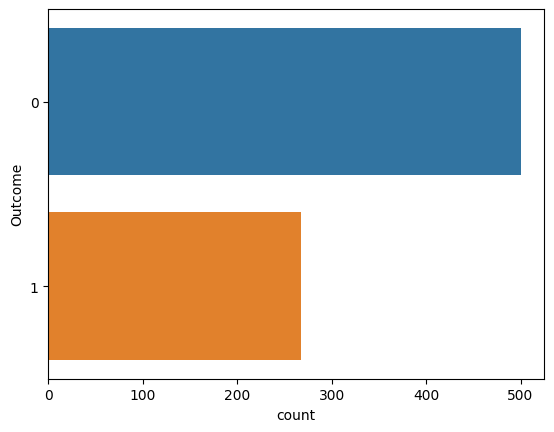

In [ ]:
# Check the spread of data across classes
sns.countplot(y='Outcome', data=india_df)

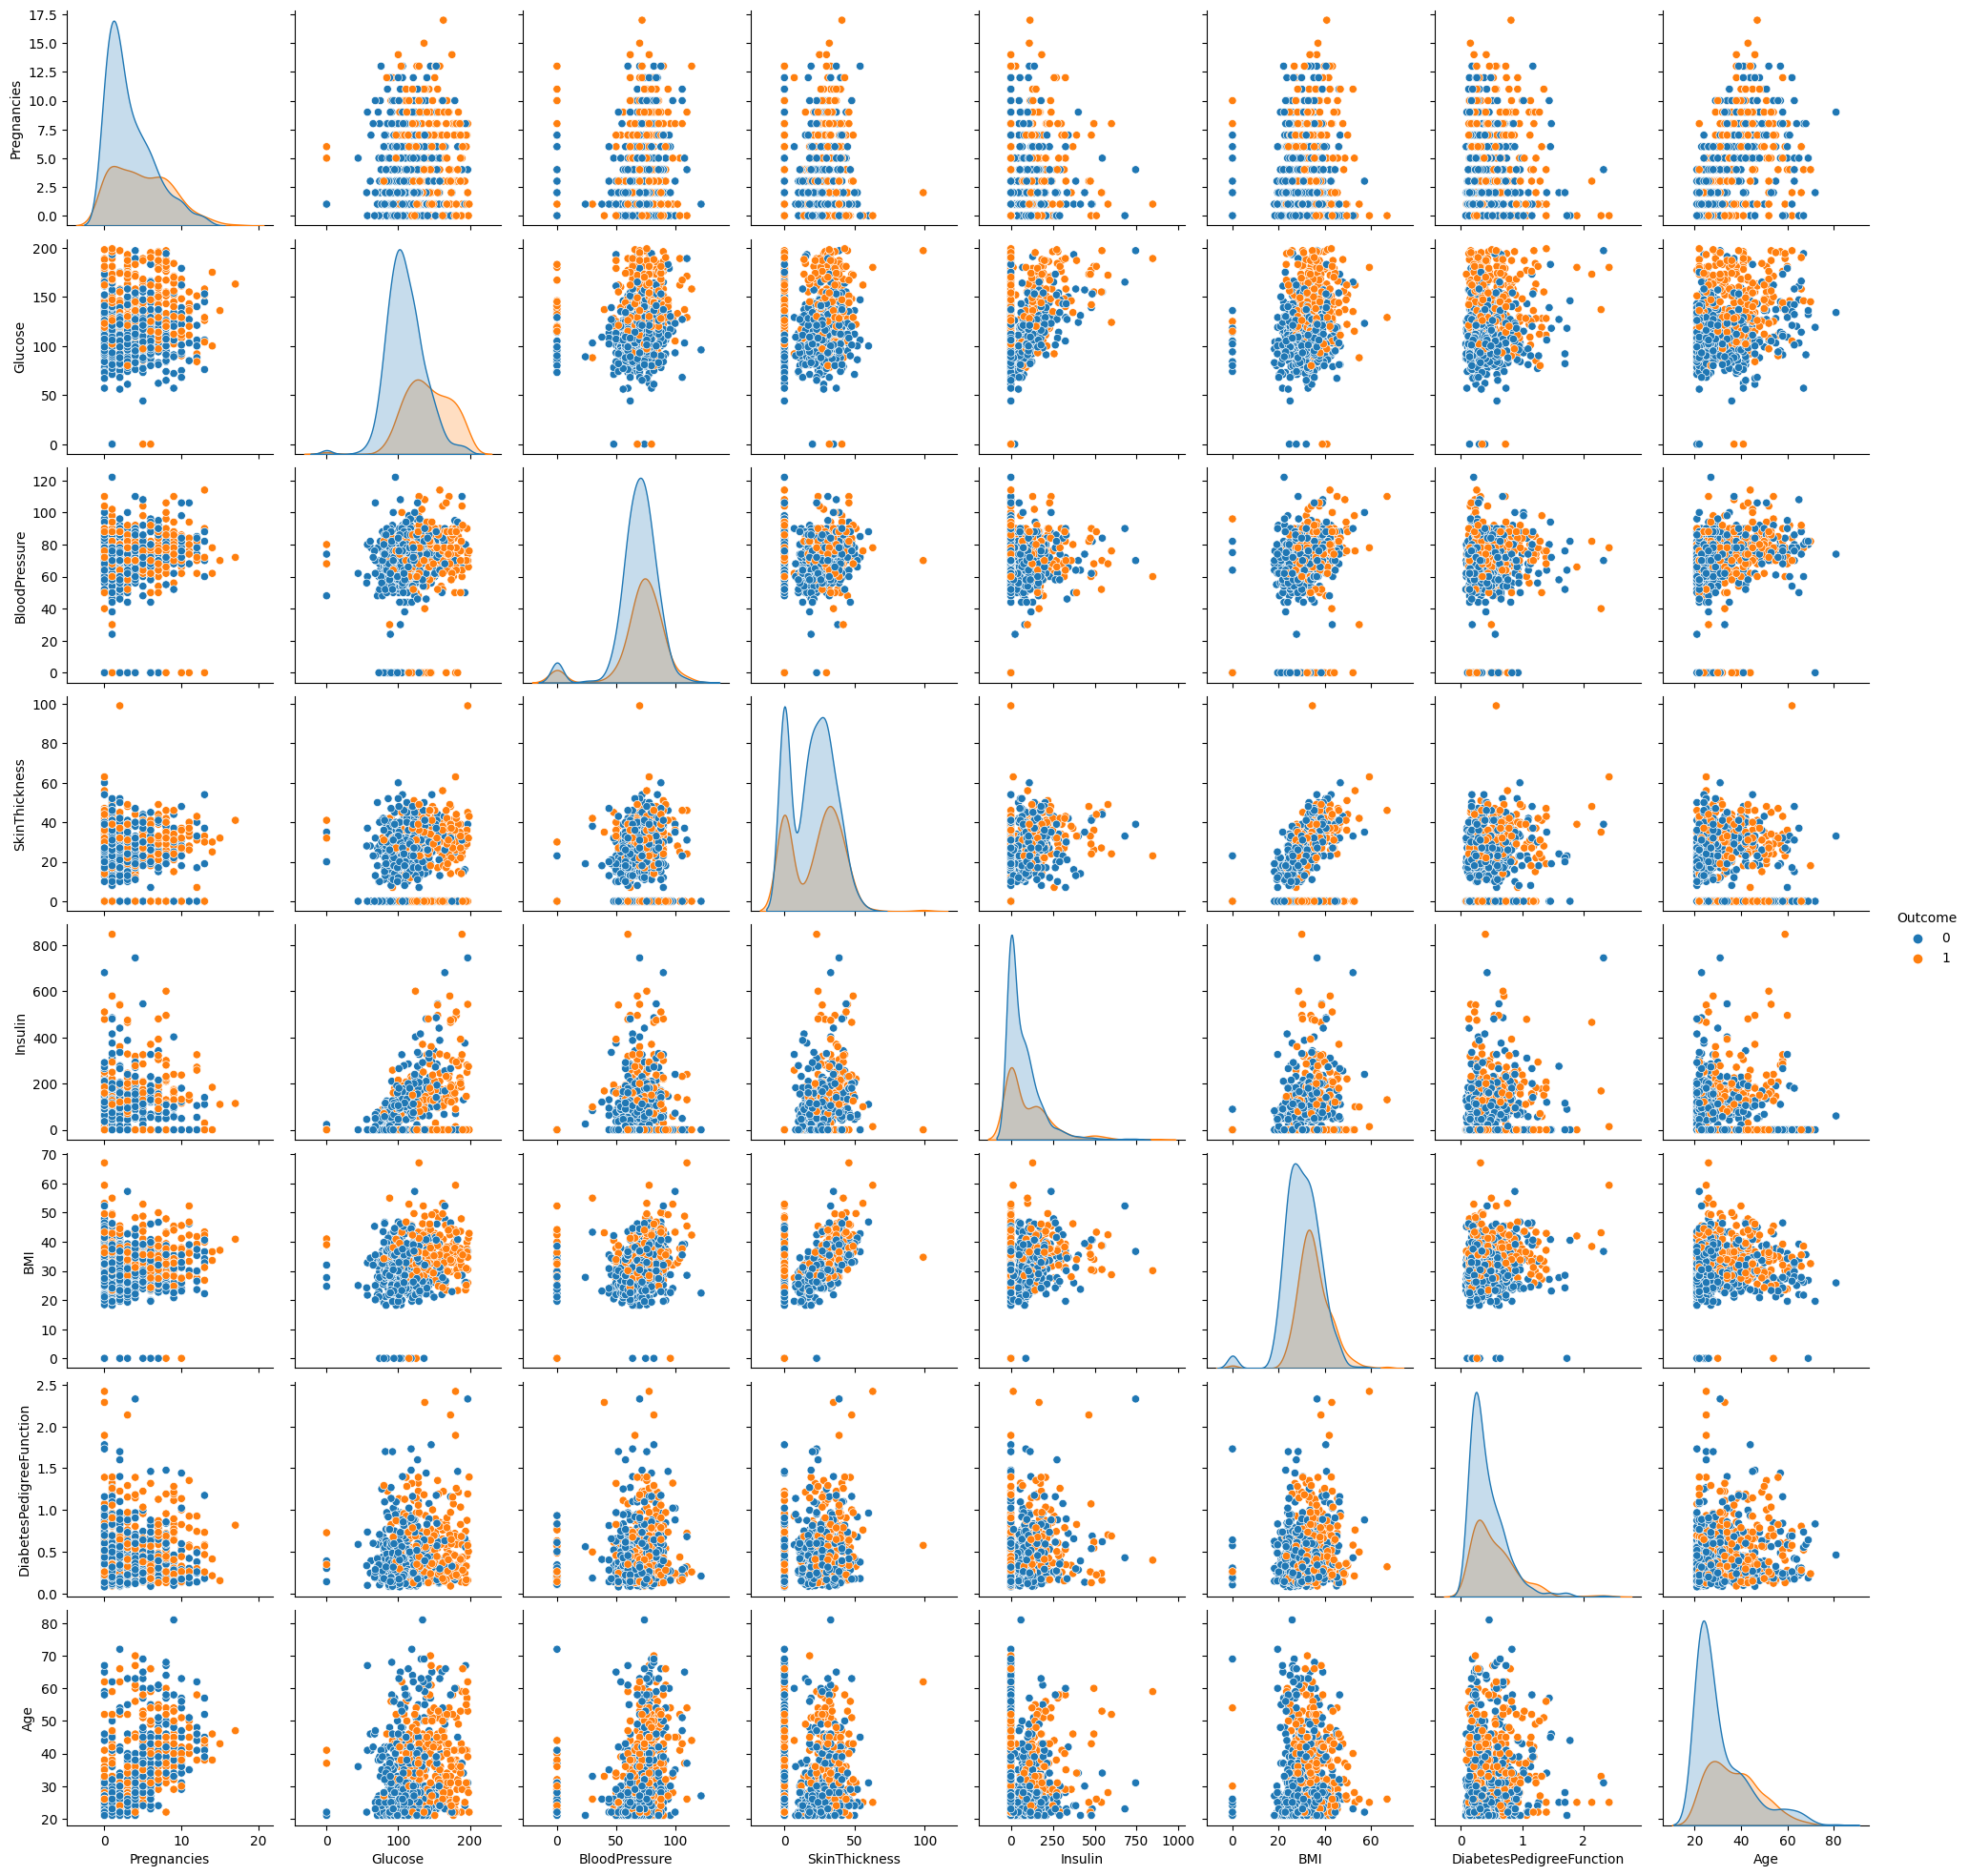

In [ ]:
sns.pairplot(india_df, hue="Outcome")

<Axes: >

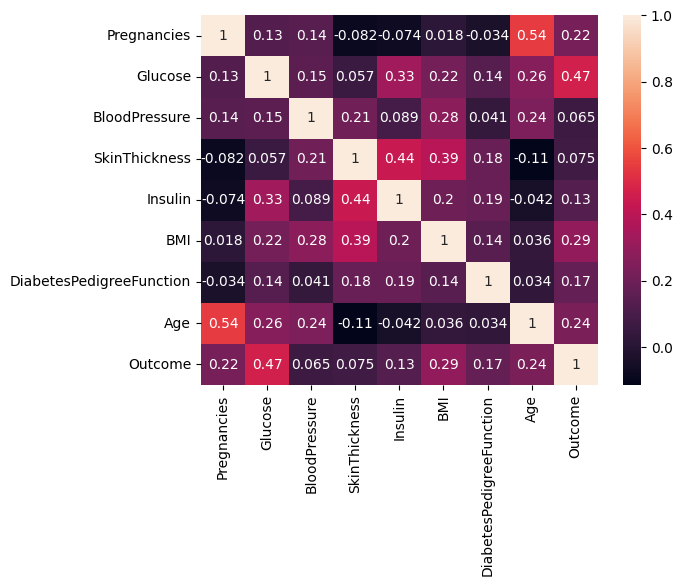

In [ ]:
sns.heatmap(india_df.corr(), annot=True)

In [ ]:
from sklearn import preprocessing
X = india_df[india_df.columns[:-1]] # Everything except Outcome
y = india_df['Outcome']

scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
print('Train :', len(X_train))
print('Test  :', len(X_test))

Train : 537
Test  : 231


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
log = LogisticRegression(random_state=42)
log.fit(X_train, y_train)

y_pred = log.predict(X_test)
log.score(X_test, y_test)

0.7359307359307359

<Axes: >

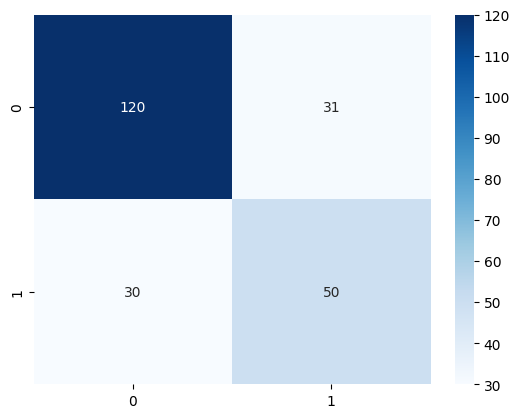

In [ ]:
cfn_mat = np.array(confusion_matrix(y_test, y_pred), dtype='float')
sns.heatmap(cfn_mat, annot=True,cmap='Blues',fmt='g')

## Tree-Based Models

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7012987012987013


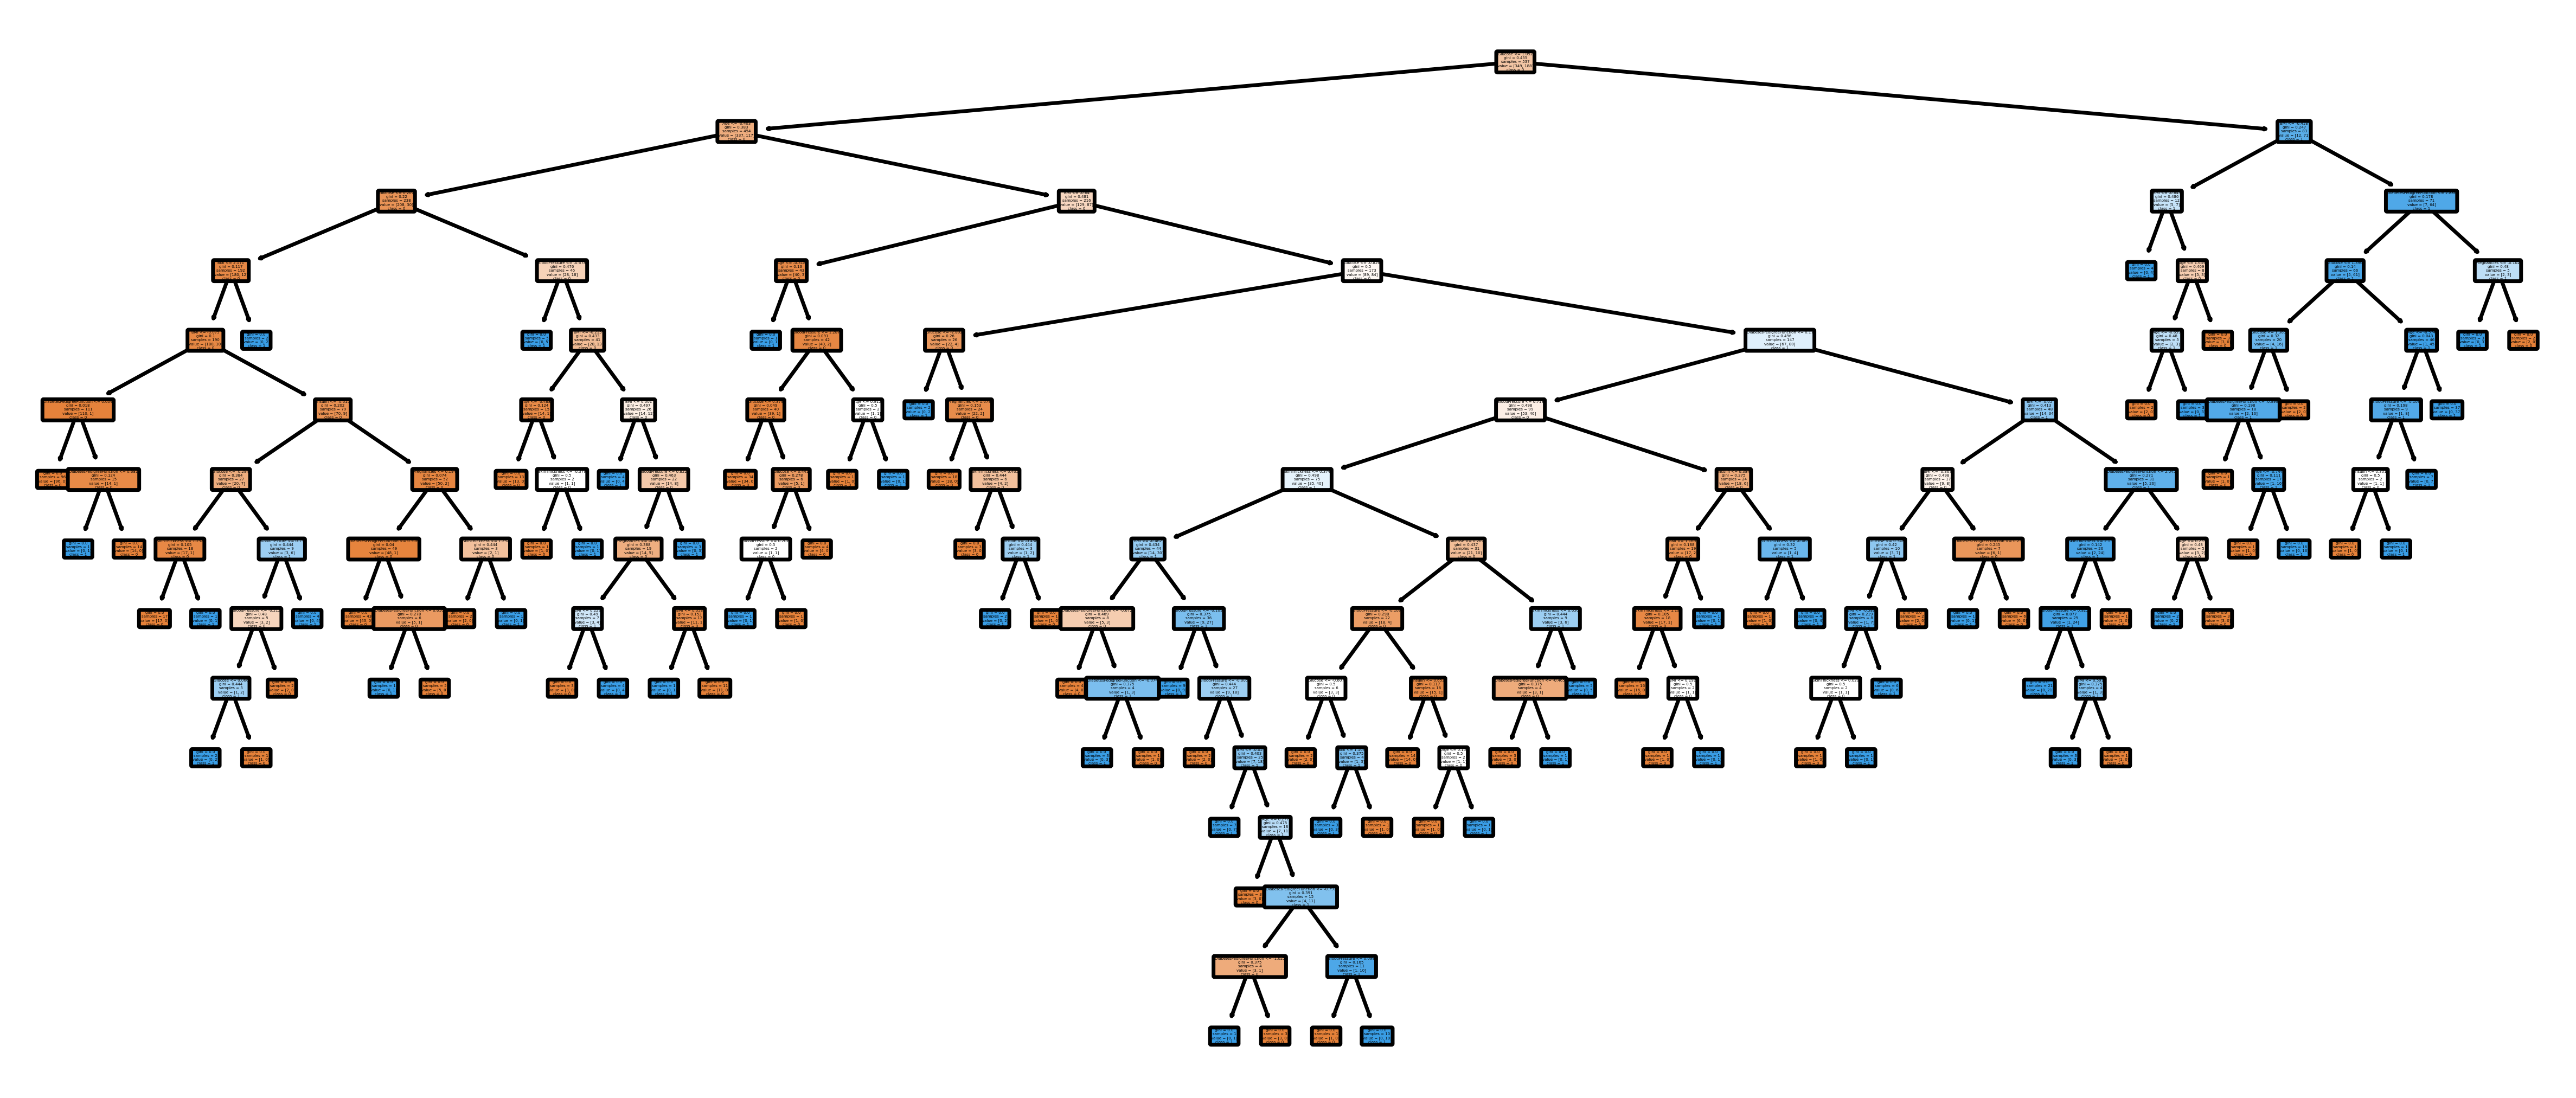

In [ ]:
#Visiual Tree

from sklearn import tree
import matplotlib.pyplot as plt

feature_names = india_df.columns[:-1]

plt.figure(figsize=(12, 5), dpi=500)
tree.plot_tree(clf,
               feature_names=feature_names,
               class_names=["0", "1"],
               filled=True,
               rounded=True);
plt.savefig('dtree.png')

#### Optimizing Decision Tree Performance

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7186147186147186


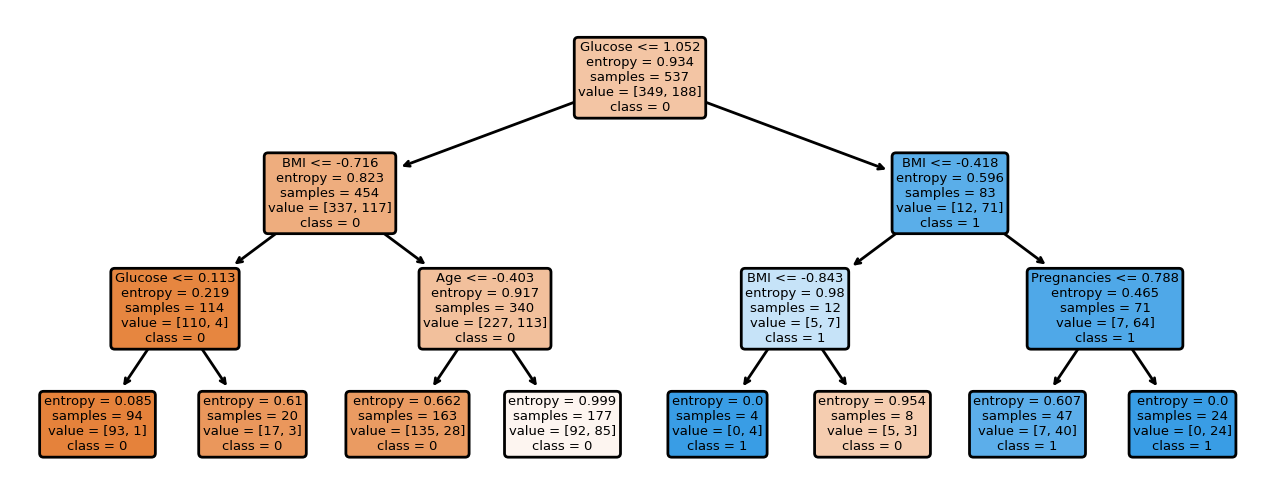

In [ ]:
plt.figure(figsize=(8, 3), dpi=200)
tree.plot_tree(clf,
               feature_names=feature_names,
               class_names=["0", "1"],
               filled=True,
               rounded=True);
plt.savefig('diabetes.png')

              precision    recall  f1-score   support

           0       0.72      0.93      0.81       151
           1       0.71      0.31      0.43        80

    accuracy                           0.72       231
   macro avg       0.72      0.62      0.62       231
weighted avg       0.72      0.72      0.68       231

[[141  10]
 [ 55  25]]


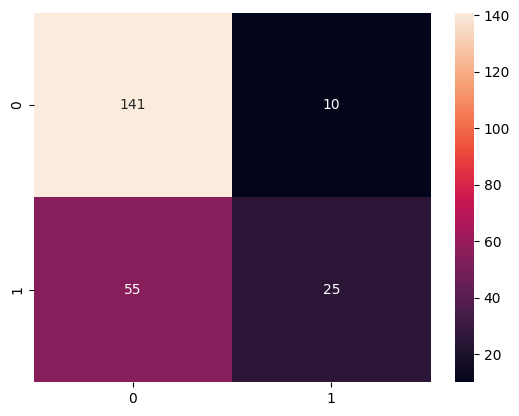

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

matrix= confusion_matrix(y_test, y_pred)
sns.heatmap(matrix,annot = True, fmt = "d")


print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

### Random Forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
pred_rf = rf.predict(X_test)

Accuracy Score =  0.77
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       151
           1       0.67      0.66      0.67        80

    accuracy                           0.77       231
   macro avg       0.75      0.75      0.75       231
weighted avg       0.77      0.77      0.77       231

[[125  26]
 [ 27  53]]


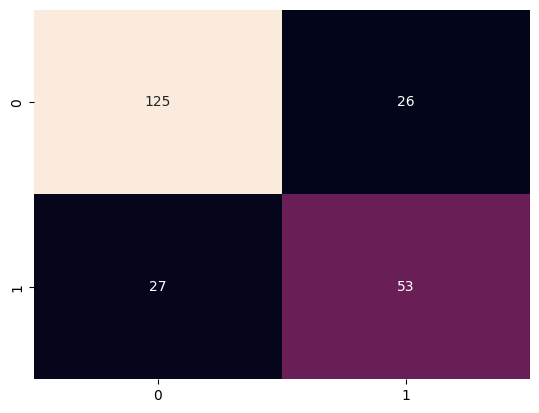

In [ ]:
cm = confusion_matrix(y_test,pred_rf)
sns.heatmap(cm, cbar = False, fmt = 'g', annot = True)
print('Accuracy Score = ',round(accuracy_score(y_test,pred_rf),2))
print(classification_report(y_test,pred_rf))
print(confusion_matrix(y_test,pred_rf))

### Gradient Boosting Regression

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state=42)
gbrt.fit(X_train, y_train)
gbr_pred = gbrt.predict(X_test)


Accuracy Score =  0.75
              precision    recall  f1-score   support

           0       0.82      0.79      0.81       151
           1       0.63      0.66      0.65        80

    accuracy                           0.75       231
   macro avg       0.72      0.73      0.73       231
weighted avg       0.75      0.75      0.75       231

[[120  31]
 [ 27  53]]


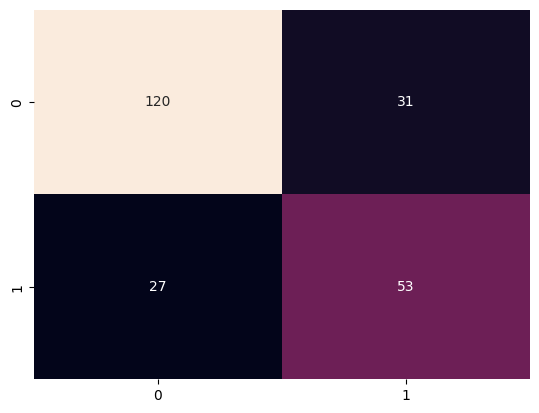

In [ ]:
cm = confusion_matrix(y_test,gbr_pred)
sns.heatmap(cm, cbar = False, fmt = 'g', annot = True)
print('Accuracy Score = ',round(accuracy_score(y_test,gbr_pred),2))
print(classification_report(y_test,gbr_pred))
print(confusion_matrix(y_test,gbr_pred))

### XGBoost

In [ ]:
import xgboost as xgb
xgb_1 = xgb.XGBClassifier()
xgb_1.fit(X_train, y_train)
xgb_pred = xgb_1.predict(X_test)

Accuracy Score =  0.74
              precision    recall  f1-score   support

           0       0.82      0.77      0.79       151
           1       0.61      0.68      0.64        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231

[[116  35]
 [ 26  54]]


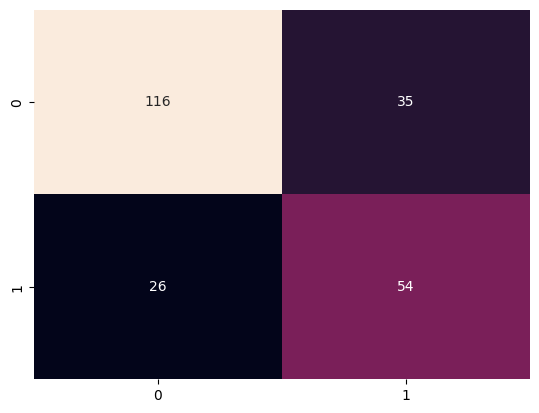

In [ ]:
cm = confusion_matrix(y_test,xgb_pred)
sns.heatmap(cm, cbar = False, fmt = 'g', annot = True)
print('Accuracy Score = ',round(accuracy_score(y_test,xgb_pred),2))
print(classification_report(y_test,xgb_pred))
print(confusion_matrix(y_test,xgb_pred))

### LightGBM Regressor

In [ ]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
lgbm_pred = lgbm.predict(X_test)

[LightGBM] [Info] Number of positive: 188, number of negative: 349
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000200 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 611
[LightGBM] [Info] Number of data points in the train set: 537, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.350093 -> initscore=-0.618630
[LightGBM] [Info] Start training from score -0.618630
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

Accuracy Score =  0.74
              precision    recall  f1-score   support

           0       0.82      0.77      0.79       151
           1       0.61      0.68      0.64        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231

[[116  35]
 [ 26  54]]


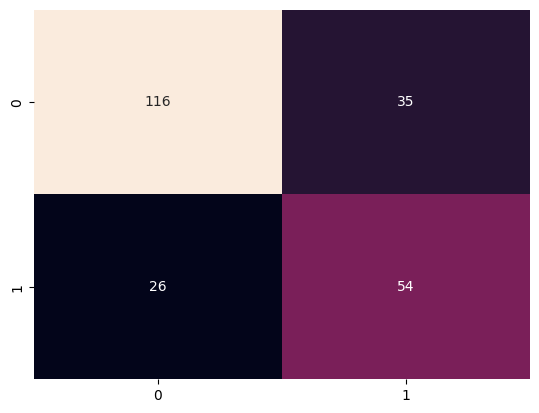

In [ ]:
cm = confusion_matrix(y_test,lgbm_pred)
sns.heatmap(cm, cbar = False, fmt = 'g', annot = True)
print('Accuracy Score = ',round(accuracy_score(y_test,lgbm_pred),2))
print(classification_report(y_test,lgbm_pred))
print(confusion_matrix(y_test,lgbm_pred))

# Unsupervised Learning

## Kmeans Cluster

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

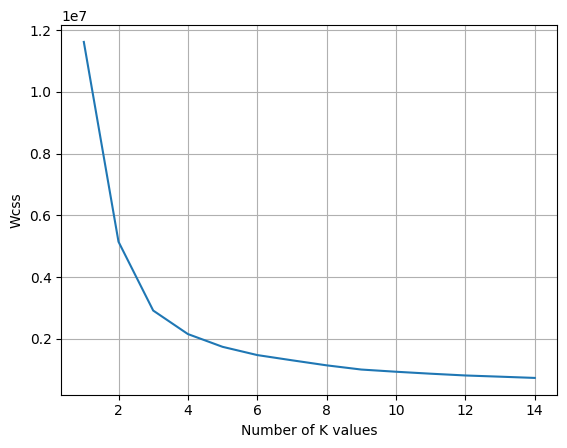

In [ ]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.cluster import AgglomerativeClustering

df = india_df
data = india_df[india_df.columns[:-1]]
y_true = india_df['Outcome']

wcss=[]
for K in range(1,15):

    Kmeans = KMeans(n_clusters=K)
    Kmeans.fit(data)
    wcss.append(Kmeans.inertia_) # inertia_ calculates wcss.

plt.plot(range(1,15),wcss)
plt.xlabel("Number of K values")
plt.ylabel("Wcss")
plt.grid()

#### Optimum K value is 2

In [ ]:
n_Kmeans = KMeans(n_clusters = 2)
y_pred = n_Kmeans.fit_predict(data)
df['Kmeans_Label'] = y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true, y_pred)
accuracy

0.66015625

Text(0, 0.5, 'Glucose')

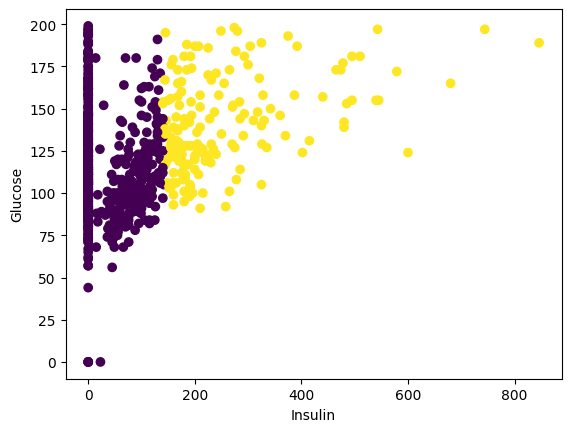

In [ ]:
plt.scatter(x="Insulin",y="Glucose",data=df,c="Kmeans_Label")
plt.xlabel("Insulin")
plt.ylabel("Glucose")

## Hierarchical Clustring

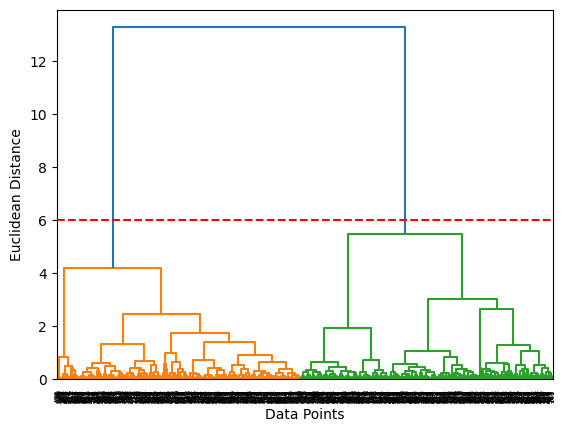

In [ ]:
from sklearn.preprocessing import normalize

data_scaled = normalize(data)
data2= pd.DataFrame(data_scaled, columns=data.columns)
data2.head()

from scipy.cluster.hierarchy import linkage,dendrogram

merg = linkage(data2,method="ward")
dendrogram(merg,leaf_rotation=90)

plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.axhline(y=6, color='r', linestyle='--')

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2,affinity='euclidean', linkage='ward')
y_pred_2=cluster.fit_predict(data2)
df["Hierarchical_Label"] = y_pred_2

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  Kmeans_Label  Hierarchical_Label  
0                     0.627   50        1             2                   1  
1                     0.351   31        0             2                   1  
2                     0.672   32        1             2                   1  
3                     0.167   21        0             0                   0  
4                     2.288   33        1             1                   0

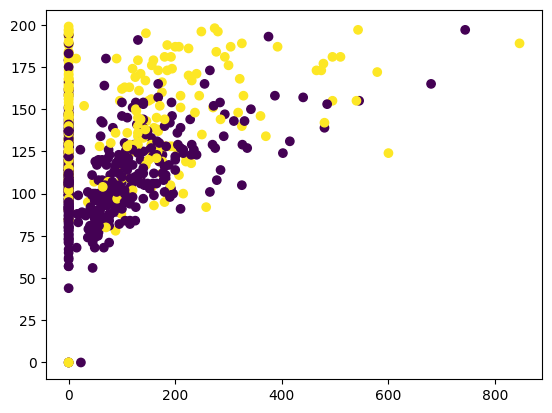

In [ ]:
plt.scatter(x="Insulin",y="Glucose",data=df,c="Outcome")

Text(0, 0.5, 'Glucose')

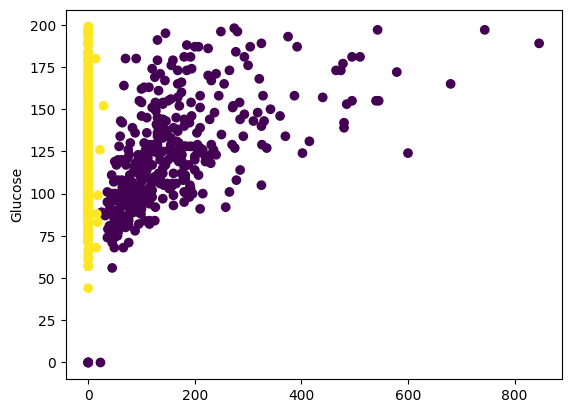

In [ ]:
plt.scatter(x="Insulin",y="Glucose",data=df,c="Hierarchical_Label")
plt.ylabel("Glucose")

In [ ]:
accuracy = accuracy_score(y_true, y_pred_2)
accuracy

0.5182291666666666